In [89]:
import numpy as np
import matplotlib.pyplot as plt
from astropy import units as u
from astropy import constants as c

#Make np arrays print in scientific notation:
np.set_printoptions(formatter={'float': lambda x: format(x, '9.4E')})
#Make numbers display in exponential form:
%precision %e

u'%e'

In [90]:
indx, halomass, haloradius, vmax, xpos, y, z, v_x, v_y, v_z = np.loadtxt (
    "halo_bolshoi_z0.00_D360.dat", unpack=True)
#halo mass per 250/0.7 cubic megaparsecs

In [91]:
#Output the arrays in a columnated format so I can see what I'm working with
np.savetxt("columnated.txt",zip(indx,halomass,haloradius,vmax,xpos, y, z, v_x,
                         v_y, v_z), fmt='%30.8f')

c:\python27\lib\site-packages\ipykernel\__main__.py:9: DeprecationWarning: object of type <type 'float'> cannot be safely interpreted as an integer.


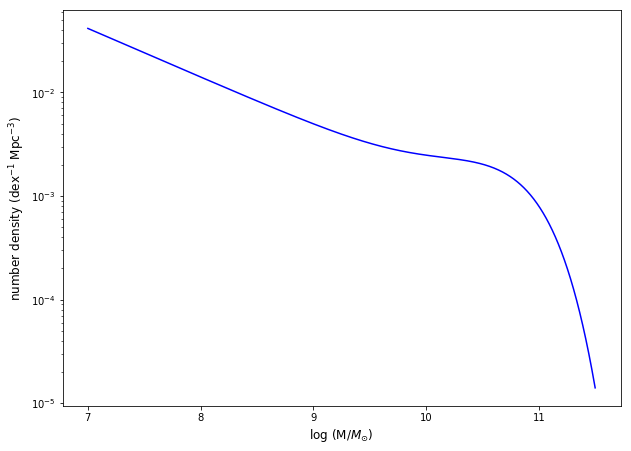

In [92]:
#CALCULATING AND PLOTTING THE GALAXY MASS DENSITY FUNCTION

m_ast = 10.**10.66 #M* in solar mass
phi_ast1 = 3.96*10.**-3. #Mpc^-3
alpha1 = -0.35
phi_ast2 = 0.79*10.**-3. #Mpc^-3
alpha2 = -1.47

logmratio = np.linspace(7,11.5,2e3) #Log of Galaxy mass to solar mass
m = 10**logmratio #galaxy mass in solar mass
phi = np.exp(-m/m_ast)*(phi_ast1*(m/m_ast)**alpha1+phi_ast2*(m/m_ast)
                        **alpha2)/m_ast*m

fig=plt.figure(figsize=(10,16))

galaxymassplt=fig.add_subplot(2,1,1)

galaxymassplt.semilogy(logmratio,phi,'b-')
galaxymassplt.set_ylabel('number density (dex$^{-1}$ Mpc$^{-3}$)',fontsize=12)
galaxymassplt.set_xlabel('log (M/$M_{\odot}$)',fontsize=12)

plt.show()

halofreq:
[0.0000E+00 0.0000E+00 0.0000E+00 0.0000E+00 0.0000E+00 0.0000E+00
 0.0000E+00 0.0000E+00 0.0000E+00 0.0000E+00 0.0000E+00 0.0000E+00
 0.0000E+00 0.0000E+00 0.0000E+00 0.0000E+00 0.0000E+00 0.0000E+00
 0.0000E+00 0.0000E+00 0.0000E+00 0.0000E+00 0.0000E+00 0.0000E+00
 0.0000E+00 0.0000E+00 0.0000E+00 0.0000E+00 0.0000E+00 0.0000E+00
 0.0000E+00 0.0000E+00 0.0000E+00 0.0000E+00 0.0000E+00 0.0000E+00
 0.0000E+00 0.0000E+00 0.0000E+00 0.0000E+00 0.0000E+00 0.0000E+00
 0.0000E+00 0.0000E+00 0.0000E+00 0.0000E+00 0.0000E+00 0.0000E+00
 0.0000E+00 0.0000E+00 0.0000E+00 0.0000E+00 0.0000E+00 0.0000E+00
 0.0000E+00 0.0000E+00 0.0000E+00 0.0000E+00 0.0000E+00 0.0000E+00
 0.0000E+00 0.0000E+00 0.0000E+00 0.0000E+00 0.0000E+00 0.0000E+00
 0.0000E+00 0.0000E+00 0.0000E+00 0.0000E+00 0.0000E+00 0.0000E+00
 0.0000E+00 0.0000E+00 0.0000E+00 0.0000E+00 0.0000E+00 0.0000E+00
 0.0000E+00 0.0000E+00 0.0000E+00 0.0000E+00 0.0000E+00 0.0000E+00
 0.0000E+00 0.0000E+00 0.0000E+00 0.0000E+00 0.0000E

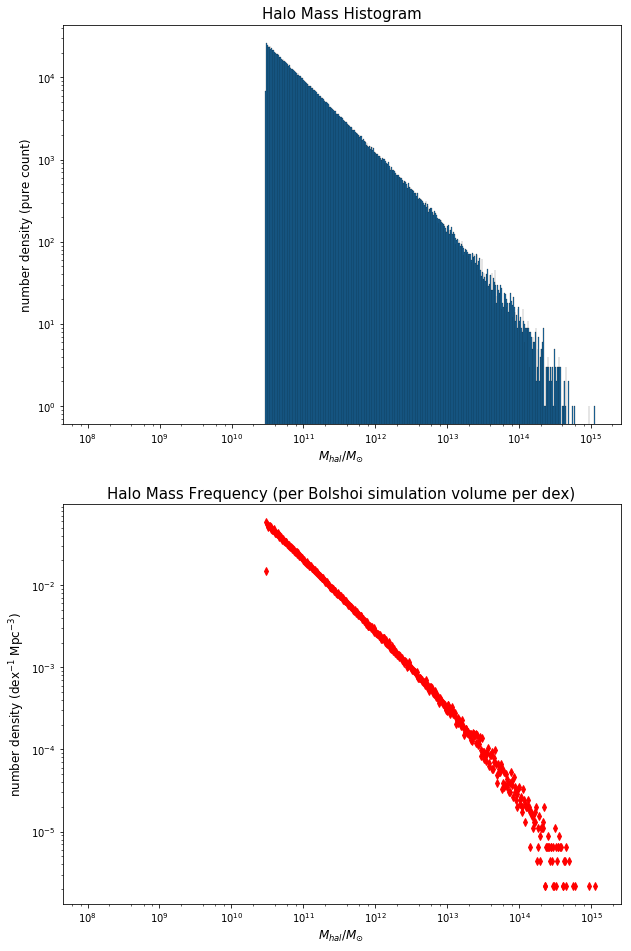

In [93]:
#BINNING AND PLOTTING HALO MASS DENSITIES

binsize=0.01 #Bin size in units of dex
#Creating the bins, which span from 8 dex to 15.06 dex:
bins=np.logspace(8,15.06,(15.06-8.)/binsize+1) #non-exponential bins (Add 1 to the num arg because the elements include the starting point.)
logbins=np.log10(bins) #bins in dex units

fig=plt.figure(figsize=(10,25))

halomassplot=fig.add_subplot(3,1,1)
halofreq, binsout, patches = halomassplot.hist(halomass,bins=bins,edgecolor='k',linewidth=0.2)
halomassplot.set_xscale('log')
halomassplot.set_yscale('log')
halomassplot.set_ylabel('number density (pure count)',fontsize=12)
halomassplot.set_xlabel('$M_{hal}/M_{\odot}$',fontsize=12)
halomassplot.set_title('Halo Mass Histogram',fontsize=15)

halofreq=halofreq/(250./0.7)**3./binsize #frequency per cubic Megaparsec per dex (diving by bin size to make the function independent of binsize, dividing by 0.7 is dividing by h)
midbins = (binsout[1:]+binsout[:-1])/2.
logmidbins=np.log10(midbins)

dotplot=fig.add_subplot(3,1,2)
dotplot.plot(midbins,halofreq,'rd',markersize=5)
dotplot.set_xscale('log')
dotplot.set_yscale('log')
dotplot.set_ylabel('number density (dex$^{-1}$ Mpc$^{-3}$)',fontsize=12)
dotplot.set_xlabel('$M_{hal}/M_{\odot}$',fontsize=12)
dotplot.set_title('Halo Mass Frequency (per Bolshoi simulation volume per dex)',fontsize=15)

##Debugging
print 'halofreq:'
print halofreq
##End debugging

plt.show()

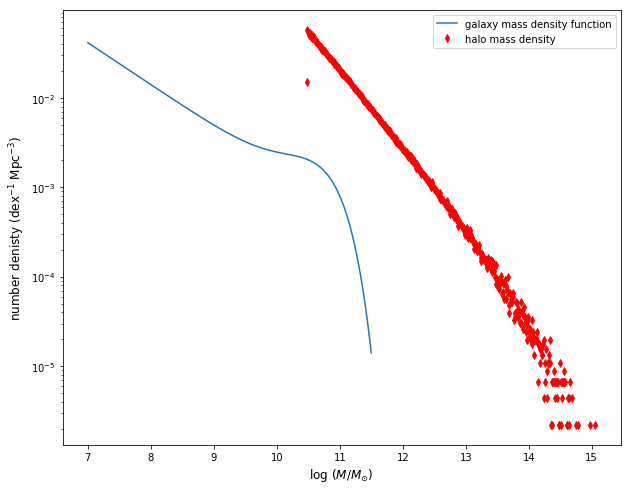

In [94]:
#PLOT THE GALAXY AND HALO MASS DENSITY FUNCTIONS ON THE SAME PLOT WITHOUT ANY AXES MANIPUATIONS

plt.figure(figsize=(10,8))

plt.semilogy(logmratio,phi,label='galaxy mass density function') #Plot the galaxy mass function
plt.xlabel('log ($M/M_{\odot}$)',fontsize=12)
plt.ylabel('number denisty (dex$^{-1}$ Mpc$^{-3}$)',fontsize=12)
plt.semilogy(logmidbins,halofreq,'rd',markersize=5,label='halo mass density')
plt.legend()
plt.show()

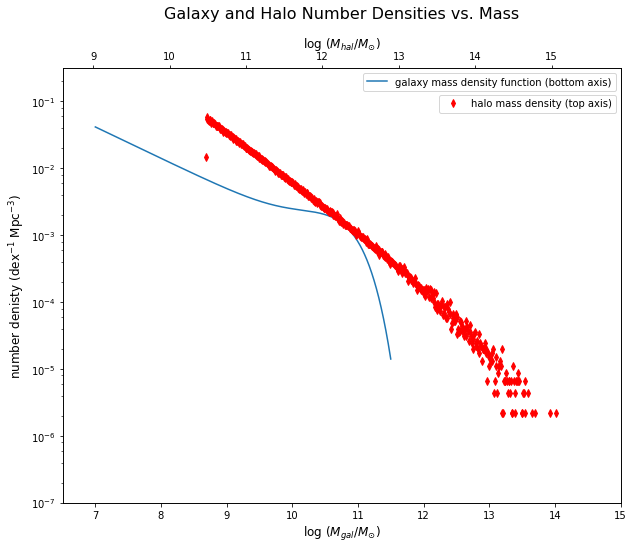

In [95]:
#PLOT THE HALO AND GALAXY MASS DENSITY FUNCTION ON THE SAME PLOT, MOVING THE HALO MASS FUNCTION TO THE LEFT

plt.figure(figsize=(10,8))

plt.semilogy(logmratio,phi,label='galaxy mass density function (bottom axis)') #Plot the galaxy mass function
plt.xlabel('log ($M_{gal}/M_{\odot}$)',fontsize=12)
plt.ylabel('number denisty (dex$^{-1}$ Mpc$^{-3}$)',fontsize=12)
plt.xlim(6.5,15)
plt.legend()

plt.twiny() #make a second x axis
plt.ylim(10.**-7.,10.**-0.5)

plt.semilogy(logmidbins,halofreq,'rd',markersize=5,label='halo mass density (top axis)')
plt.xlim(8.6,15.9) #setting xlim for halo function
plt.xlabel('log ($M_{hal}/M_{\odot}$)',fontsize=12)

plt.legend(bbox_to_anchor=[1,0.95])
plt.title('Galaxy and Halo Number Densities vs. Mass',fontsize=16,y=1.1)

plt.show()

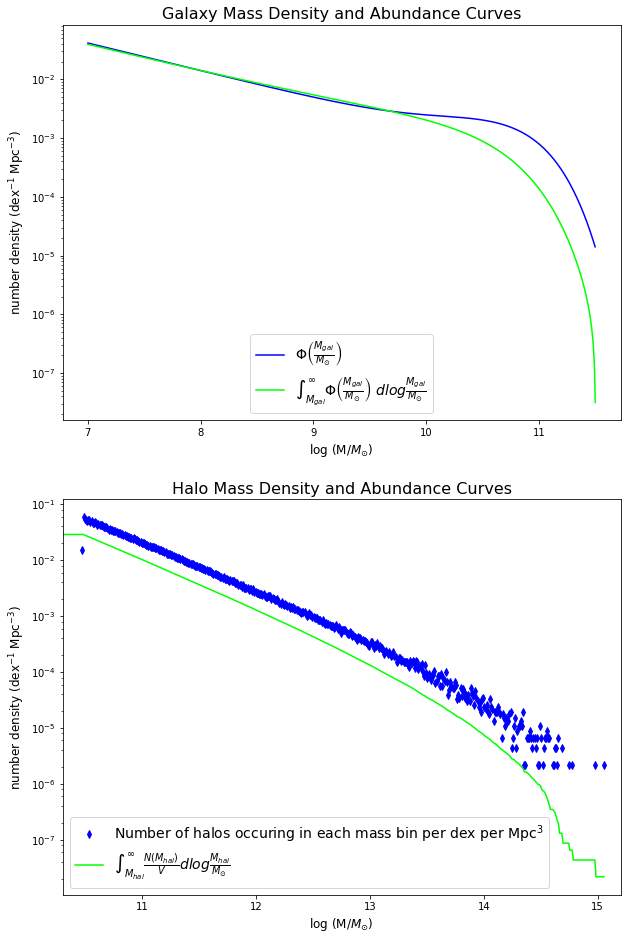

Okay: halofrequency integral from 0 to inf matches halomass array size.


In [96]:
#CREATE THE ABUNDANCE CURVE FOR GALAXY MASS
revphi = np.flip(phi,0) #reverse galaxy number density array so I can calculate the area as the integral from M_gal to inf
revlogmratio = np.flip(logmratio,0) #reverse the logmratio array so I can plot the area later in the code
dx_gal = (logmratio.max()-logmratio.min())/(len(logmratio))
sumdy_gal = np.array([revphi[:i].sum() for i in np.arange(1,len(phi)+1,1)])
cumulativegalnumdensity=sumdy_gal*dx_gal
logcumulativegalnumdensity=np.log10(cumulativegalnumdensity)

#Plotting galaxy
fig=plt.figure(figsize=(10,16))

galaxymassplt=fig.add_subplot(2,1,1)
galaxymassplt.semilogy(logmratio,phi,'b-', #Replot the galaxy mass density function created earlier
                      label='$\\Phi \\left(\\frac{M_{gal}}{M_{\\odot}} \\right)$')
galaxymassplt.set_ylabel('number density (dex$^{-1}$ Mpc$^{-3}$)',fontsize=12)
galaxymassplt.set_xlabel('log (M/$M_{\odot}$)',fontsize=12)
galaxymassplt.semilogy(revlogmratio,cumulativegalnumdensity,color=(0,1,0), #Plot the area under the galaxy mass density function according to the integral from M_gal to inf
                       label='$\\int_{M_{gal}}^{\\infty}\\Phi \\left(\\frac{M_{gal}}{M_{\\odot}} \\right)\;'
                       'dlog\\frac{M_{gal}}{M_{\\odot}}$')
galaxymassplt.legend(fontsize=14,loc='lower center')
galaxymassplt.set_title('Galaxy Mass Density and Abundance Curves',fontsize=16)
                        
#CREATE THE ABUNDANCE CURVE FOR HALO MASS
revhalofreq = np.flip(halofreq,0) #reverse the halo frequency array so I can calculate the area as the integral from M_hal to infinity
revlogmidbins = np.flip(logmidbins,0) #reverse the logmidbins array so I can plot the area later in the code
sumdy_hal=np.array([revhalofreq[:i].sum() for i in np.arange(1,len(revhalofreq)+1,1)]) #Create an array of the sum of all frequencies/Mpc^3 from M_hal to infinity, using revhalofreq, which starts from the most massive halos and progresses to the least massive halos
cumulativehalnumdensity=sumdy_hal*binsize #midpoint approximation of the the curve of integral of all Halo frequencies/Mpc^3 from M_hal to infinity
logcumulativehalnumdensity=np.log10(cumulativehalnumdensity)

#Plotting halo
haloabundanceplt=fig.add_subplot(2,1,2)
haloabundanceplt.semilogy(logmidbins,halofreq,'bd',markersize=5,label='Number of halos occuring in each mass bin per dex per Mpc$^{3}$')
haloabundanceplt.semilogy(revlogmidbins,cumulativehalnumdensity,color=(0,1,0),
                          label='$\\int_{M_{hal}}^{\infty}\\frac{N(M_{hal})}{V}dlog\\frac{M_{hal}}{M_{\odot}}$')
haloabundanceplt.set_xlabel('log (M/$M_{\odot}$)',fontsize=12)
haloabundanceplt.set_ylabel('number density (dex$^{-1}$ Mpc$^{-3}$)',fontsize=12)
haloabundanceplt.legend(fontsize=14)
haloabundanceplt.set_title('Halo Mass Density and Abundance Curves',fontsize=16)
haloabundanceplt.set_xlim(10.3,15.2)

plt.savefig('Abundance Curves.png')
plt.show()

#Perform a test:
roundeddigits=17
if round(halomass.size/(250./0.7)**3.,roundeddigits)==round(np.max(cumulativehalnumdensity),roundeddigits): #Testing to make sure that the number of elements in the halomass array matches the integral from 0 to infinity. *TEST ROUNDED TO NEAREST 10^-17 BECAUSE OF ROUNDING ERRORS IN THE CALCULATION OF CUMULATIVE DENSITY IMPLIED BY HALOMASS ARRAY SIZE
    print"Okay: halofrequency integral from 0 to inf matches halomass array size."
else:
    print("Error: halofrequency integral from 0 to inf does not match halo array size."
          '\nCount implied by cumulativehalnumdensity: {0:0.20f}'
          '\nSize of halomass array: {1:0.20f}'
          '\nCumulative density implied by halomass size: {2:0.20e}'
          '\nMax of cumulativehalnumdensity: {3:0.20e}'.format(np.max(cumulativehalnumdensity)*(250./0.7)**3.,halomass.size,halomass.size/(250./0.7)**3.,
                                              np.max(cumulativehalnumdensity)))
    

In [97]:
'''
FIXED---nlowerbound isn't working because I need the minimum of all numbers that aren't -inf.
PASSED---ANOTHER problem is going to be that there are more than one instance of the minimum density in cumulativehalnumdensity. BUT it's only until we hit another instance that one density repeats, because we're looking at the cumulative number density, so this is actually not that big an issue. The only thing I might change is to go into the original Bolshoi data and find exactly what the mass is in the given bin, and plug that into the lookup formula output. 
PASSED---The lookup function waits until the lookup array value is MORE THAN the lookup value. Then it returns the value corresponding to the value in the lookup array >= the lookup value. I need to decide if I want to impliment a lookup that will return the closest value, not just the one that's greater than the lookup value.
'''
nlowerbound = min(min(np.where(cumulativehalnumdensity==0.0,1.0,cumulativehalnumdensity)),min(cumulativegalnumdensity)) #find the minimum of n_gal(>M_gal) and n_hal(>M_hal), which are the cumulative number densities for each, in units of Mpc^-3 dex^-1
nupperbound = max(max(cumulativehalnumdensity),max(cumulativegalnumdensity)) #find the maximum ...
nrange = np.logspace(np.log10(nlowerbound),np.log10(nupperbound),500) #create a logarithmically spaced array of densities in units of Mpc^-3 dex^-1 for which the program will find corresponsing >M_gal and >M_hal
lognrange = np.log10(nrange) #defining nrange in dex for later convenience
step=np.average(lognrange[1:]-lognrange[:-1])

def lookup(lookupval,lookuparray,resultarray,threshold): #defining a lookup function that assumes lookuparray is sorted in ascending order
    lookuparval,i=float('-inf'),0
    while lookuparval<lookupval: #while the values in the lookup array are less than the lookup value
        if i>lookuparray.size-1: #If the loop runs through every element of the lookuparray and lookuparval is still < lookupval, end the loop, otherwise an error will occur
            i-=1
            #Work backwards to find i corresponding to the last time lookuparval increased
            while lookuparray[i]==lookuparray[i-1]:
                i-=1
            break #Once the nested loop has gotten i back to the point where lookuparray[i]!=lookuparray[i], break the primary loop
        lookuparval=lookuparray[i]
        '''       
        ##Debugging
        roundeddigits=3
        if round(lookupval,roundeddigits)==round(-1.528655030661408176229087985121,roundeddigits):
            print('\ni: {0:0.0f}'.format(i))
            print('lookup array size: {0:0.0f}'.format(lookuparray.size))
            print('lookuparray[{1:0.0f}]: {0:0.4e}'.format(lookuparval,i))
            print('resultarray[{1:0.0f}]: {0:0.4f}'.format(resultarray[i],i))
        ##End debugging
        '''
        i+=1
        if i>1e4:
            sys.exit("Timeout")
    lowerlookuparval=lookuparray[max(0,i-2)]
    upperlookuparval=lookuparray[max(0,i-1)]
    
    #Check whether the lookuparval below the lookupval or the one above is closer to the lookupval and use the one that's closer
    upperdiff=np.abs(upperlookuparval-lookupval)
    lowerdiff=np.abs(lookupval-lowerlookuparval)
    if upperdiff>lowerdiff:
        if np.abs(lowerdiff)<threshold:
            result=resultarray[max(0,i-2)]
        else:
            #return #EXCLUDING "NA" FOR NOW
            result=None
    elif np.abs(upperdiff)<threshold:
        result=resultarray[max(0,i-1)]
    else:
        #return #EXCLUDING "NA" FOR NOW
        result=None
    '''
    ##Debugging
    print('Lookup value: {2:0.3e}'
          '\nUpper lookup array value: {0:0.3e}'
          '\nUpper diff: {3:0.3e}'
          '\nlog Lower lookup array value: {1:0.3e}'
          '\nLower diff: {4:0.3e}'
          .format(upperlookuparval,lowerlookuparval,lookupval,upperdiff,lowerdiff))
    if upperdiff>lowerdiff:
        print('lowerlookuparval is closer')
        if lowerdiff>threshold:
            print('but lowerdiff>threshold ({0:0.3e})'.format(threshold))
    else:
        print'upperloookuparval is closer (or equivalent)'
        if upperdiff>threshold:
            print('but upperdiff>threshold ({0:0.3e})'.format(threshold))
    if result is None:
        print('returning {0}'.format(result))
    else:
        print('diff within step ({1:0.3e})'
              '\nreturning {0:0.4e}'.format(result,threshold))
    ##End debugging
    '''
    return result
    
def populate(independentarray,lookuparray,resultsarray,threshold): 
    dependentarray=np.array([]) #create a blank array in which to put the dependent parameters that correspond to the independent parameters
    i=0
    for n in independentarray:
        '''
        ##DEBUGGING
        print('\nPOPULATE ARRAY ELEMENT {0:0.0f}'.format(i))
        i+=1
        ##END DEBUGGING
        '''
        dependentarray=np.append(dependentarray,lookup(n,lookuparray,resultsarray,threshold))
        '''
        #DEBUGGING
        print ('lookup value: {0:0.3e}'
               '\nlookup array value: {1:0.3e}'.format(n,lookup(n,lookuparray,lookuparray)))
        #END DEBUGGING
        '''
    return dependentarray

logmgal_corresponding_to_lognrange=populate(lognrange,logcumulativegalnumdensity,revlogmratio,step) #create an array of galaxy masses that correspond to the number densities in the nrange array
logmhal_corresponding_to_lognrange=populate(lognrange,logcumulativehalnumdensity,revlogmidbins,step) #create an array of halo masses that correspond to the number densities in the nrange array
logcumulativegalnumdensity_corresponding_to_lognrange=populate(lognrange,logcumulativegalnumdensity,logcumulativegalnumdensity,step)
logcumulativehalnumdensity_corresponding_to_lognrange=populate(lognrange,logcumulativehalnumdensity,logcumulativehalnumdensity,step)

'''
#Testing the lookup function---testing complete
i=30
print('\nlog nrange[{1:0.0f}] (lookup value): {0:0.2e}'.format(np.log10(nrange[i]),i))
test=lookup(nrange[i],cumulativegalnumdensity,revlogmratio) #a test, looking up the galaxy mass that corresponds to the number density nrange[i]
test=lookup(nrange[i],cumulativehalnumdensity,revlogmidbins) #a test, looking up the halo mass that corresponds to the number density nrange[i]
print('\ngalaxy mass corresponding to nrange[{1:0.0f}]: {0:0.2f}'.format(test,i))
'''

##DEBUGGING
exportarray=np.zeros(lognrange.size,dtype=[('var1',float),('var5','U7'),('var3','U7'),('var6','U7'),('var4','U7')])
exportarray['var1']=lognrange
exportarray['var3']=logmgal_corresponding_to_lognrange
exportarray['var4']=logmhal_corresponding_to_lognrange
exportarray['var5']=logcumulativegalnumdensity_corresponding_to_lognrange
exportarray['var6']=logcumulativehalnumdensity_corresponding_to_lognrange
exportheader="log number density (>=M)     closest log gal num density      log M_gal        closest log hal num density       log M_hal"
np.savetxt("abundancematching.txt",exportarray,header=exportheader,fmt="%20.4f %25s %25s %25s %25s")
#END DEBUGGING

end=1 #End cell

In [98]:
#Printing some useful data and statistics
print('lognrange step: {0:0.6e}'.format(step))
print''

print('min of halo cumulative number density: {0:0.3e}'.format(min(cumulativehalnumdensity)))
print('min of galaxy cumulative number density: {0:0.3e}'.format(min(cumulativegalnumdensity)))
print('min of both cumulativehalnumdensity and cumulativegalnumdensity: {0:0.3e}'.format(nrange[0]))
print('nlowerbound: {0:0.3e}'.format(nlowerbound))
print('log nlowerbound: {0:0.3e}'.format(np.log10(nlowerbound)))
print('max log halomass: {0:0.8f}'.format(np.log10(np.max(halomass))))

print'\nlog nrange'
print lognrange
print'\nlog halo number densities:'
print logcumulativehalnumdensity
print'\n log galaxy number densities:'
print logcumulativegalnumdensity

print'\nlog mid halo mass bins:'
print logmidbins
print'\n log galaxy mass reversed array'
print revlogmratio

lognrange step: 1.253552e-02

min of halo cumulative number density: 2.195e-08
min of galaxy cumulative number density: 3.170e-08
min of both cumulativehalnumdensity and cumulativegalnumdensity: 2.195e-08
nlowerbound: 2.195e-08
log nlowerbound: -7.659e+00
max log halomass: 15.05231680

log nrange
[-7.6585E+00 -7.6460E+00 -7.6335E+00 -7.6209E+00 -7.6084E+00 -7.5958E+00
 -7.5833E+00 -7.5708E+00 -7.5582E+00 -7.5457E+00 -7.5332E+00 -7.5206E+00
 -7.5081E+00 -7.4956E+00 -7.4830E+00 -7.4705E+00 -7.4580E+00 -7.4454E+00
 -7.4329E+00 -7.4204E+00 -7.4078E+00 -7.3953E+00 -7.3827E+00 -7.3702E+00
 -7.3577E+00 -7.3451E+00 -7.3326E+00 -7.3201E+00 -7.3075E+00 -7.2950E+00
 -7.2825E+00 -7.2699E+00 -7.2574E+00 -7.2449E+00 -7.2323E+00 -7.2198E+00
 -7.2072E+00 -7.1947E+00 -7.1822E+00 -7.1696E+00 -7.1571E+00 -7.1446E+00
 -7.1320E+00 -7.1195E+00 -7.1070E+00 -7.0944E+00 -7.0819E+00 -7.0694E+00
 -7.0568E+00 -7.0443E+00 -7.0317E+00 -7.0192E+00 -7.0067E+00 -6.9941E+00
 -6.9816E+00 -6.9691E+00 -6.9565E+00 -6.9440E

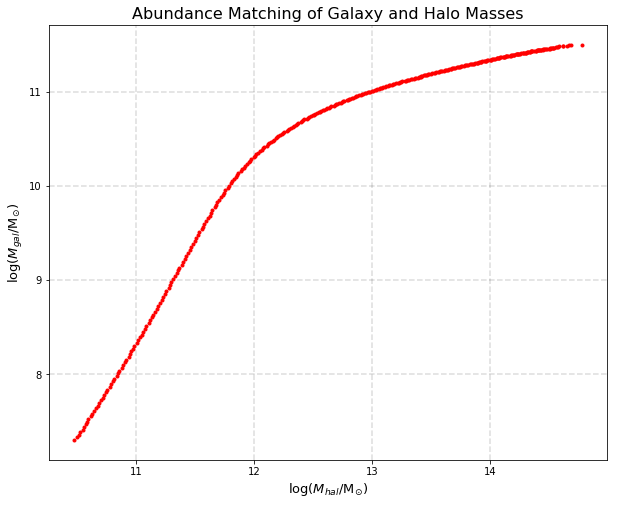

In [115]:
#PLOTTING THE ABUNDANCE MATCHING OF GALAXY MASSES TO HALO MASSES
abundancefig=plt.figure(figsize=(10,8))
abundanceplt=abundancefig.add_subplot(1,1,1)
abundanceplt.plot(logmhal_corresponding_to_lognrange,logmgal_corresponding_to_lognrange,'ro',markersize=3)
#abundanceplt.plot(logmhal_corresponding_to_lognrange,lognrange,'bo',markersize=4,label='mhal')
abundanceplt.set_ylabel('log($M_{gal}/$M$_{\odot}$)',fontsize=13)
abundanceplt.set_xlabel('log($M_{hal}/$M$_{\odot}$)',fontsize=13)
#abundanceplt.legend()
abundanceplt.set_title('Abundance Matching of Galaxy and Halo Masses',fontsize=16)
abundanceplt.grid(color='black', linestyle='--', linewidth=0.2)
plt.show()